In [1]:
#Simply select "GPU" in the Accelerator drop-down in Notebook Settings (either through the Edit menu or the command palette at cmd/ctrl-shift-P).

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [4]:
#Getting and unzipping data

!wget https://raw.githubusercontent.com/samgottuso/first_attempt_machine_learning_predicting_upsets/master/EPL_upsets.zip -c

!mkdir EPL_data

!unzip EPL_upsets.zip -d EPL_data/

--2018-03-01 01:08:44--  https://raw.githubusercontent.com/samgottuso/first_attempt_machine_learning_predicting_upsets/master/EPL_upsets.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 440958 (431K) [application/zip]
Saving to: ‘EPL_upsets.zip’

EPL_upsets.zip      100%[===================>] 430.62K  --.-KB/s    in 0.07s   

2018-03-01 01:08:44 (5.62 MB/s) - ‘EPL_upsets.zip’ saved [440958/440958]

Archive:  EPL_upsets.zip
  inflating: EPL_data/epl_2000.csv   
  inflating: EPL_data/epl_2001.csv   
  inflating: EPL_data/epl_2002.csv   
  inflating: EPL_data/epl_2003.csv   
  inflating: EPL_data/epl_2004.csv   
  inflating: EPL_data/epl_2005.csv   
  inflating: EPL_data/epl_2006.csv   
  inflating: EPL_data/epl_2007.csv   
  inflating: EPL_data/epl_2008.csv   
  inflating: EPL_data/epl_2009.csv   

In [5]:
#Some of these won't play nicely with others

!wget https://raw.githubusercontent.com/samgottuso/first_attempt_machine_learning_predicting_upsets/master/epl_2000.csv
!wget https://raw.githubusercontent.com/samgottuso/first_attempt_machine_learning_predicting_upsets/master/epl_2001.csv
!wget https://raw.githubusercontent.com/samgottuso/first_attempt_machine_learning_predicting_upsets/master/epl_2002.csv

--2018-03-01 01:08:50--  https://raw.githubusercontent.com/samgottuso/first_attempt_machine_learning_predicting_upsets/master/epl_2000.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62148 (61K) [text/plain]
Saving to: ‘epl_2000.csv’

epl_2000.csv        100%[===================>]  60.69K  --.-KB/s    in 0.03s   

2018-03-01 01:08:50 (2.16 MB/s) - ‘epl_2000.csv’ saved [62148/62148]

--2018-03-01 01:08:50--  https://raw.githubusercontent.com/samgottuso/first_attempt_machine_learning_predicting_upsets/master/epl_2001.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66230 (65K) [text/plain]
Saving to: ‘epl_

In [2]:
# Downloading and intstalling keras
!pip install keras

    100% |████████████████████████████████| 327kB 2.4MB/s 


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

S_0=pd.read_csv('epl_2000.csv', error_bad_lines=False)
S_1=pd.read_csv('epl_2001.csv',error_bad_lines=False)
S_2=pd.read_csv('epl_2002.csv',error_bad_lines=False)
S_3=pd.read_csv('EPL_data/epl_2003.csv', error_bad_lines=False)
S_4=pd.read_csv('EPL_data/epl_2004.csv', error_bad_lines=False)
S_5=pd.read_csv('EPL_data/epl_2005.csv', error_bad_lines=False)
S_6=pd.read_csv('EPL_data/epl_2006.csv', error_bad_lines=False)
S_7=pd.read_csv('EPL_data/epl_2007.csv', error_bad_lines=False)
S_8=pd.read_csv('EPL_data/epl_2008.csv', error_bad_lines=False)
S_9=pd.read_csv('EPL_data/epl_2009.csv', error_bad_lines=False)
S_10=pd.read_csv('EPL_data/epl_2010.csv', error_bad_lines=False)
S_11=pd.read_csv('EPL_data/epl_2011.csv', error_bad_lines=False)
S_12=pd.read_csv('EPL_data/epl_2012.csv', error_bad_lines=False)
S_13=pd.read_csv('EPL_data/epl_2013.csv', error_bad_lines=False)
S_14=pd.read_csv('EPL_data/epl_2014.csv', error_bad_lines=False)
S_15=pd.read_csv('EPL_data/epl_2015.csv', error_bad_lines=False)
S_16=pd .read_csv('EPL_data/epl_2016.csv', error_bad_lines=False)
S_17=pd.read_csv('EPL_data/epl_2017.csv', error_bad_lines=False)

b'Skipping line 257: expected 48 fields, saw 49\nSkipping line 258: expected 48 fields, saw 49\nSkipping line 259: expected 48 fields, saw 49\nSkipping line 260: expected 48 fields, saw 49\nSkipping line 261: expected 48 fields, saw 49\nSkipping line 262: expected 48 fields, saw 49\nSkipping line 263: expected 48 fields, saw 49\nSkipping line 264: expected 48 fields, saw 49\nSkipping line 265: expected 48 fields, saw 49\nSkipping line 266: expected 48 fields, saw 49\nSkipping line 267: expected 48 fields, saw 49\nSkipping line 268: expected 48 fields, saw 49\nSkipping line 269: expected 48 fields, saw 49\nSkipping line 270: expected 48 fields, saw 49\nSkipping line 271: expected 48 fields, saw 49\nSkipping line 272: expected 48 fields, saw 49\nSkipping line 273: expected 48 fields, saw 51\nSkipping line 274: expected 48 fields, saw 51\nSkipping line 275: expected 48 fields, saw 51\nSkipping line 276: expected 48 fields, saw 51\nSkipping line 277: expected 48 fields, saw 51\nSkipping li

In [7]:
#This allows us to merge the data together into 1 data source-- see that we are working with 6687 games (Bigger data set than the last time I ran through this)

data_names=[S_0,S_1,S_2,S_3,S_4,S_5,S_6,S_7,S_8,S_9,S_10,S_11,S_12,S_13,S_14,S_15,S_16,S_17]

merged_data=pd.concat(data_names,ignore_index=True,join='inner')

merged_data.dtypes




len(merged_data)

6687

In [0]:
#This cell adds what the Sports books picks were and whether or not it was an upset (not the same as what the sport books predicted)

setup_data=merged_data
setup_data['pick']=''
setup_data['upset']=int


ft_col=['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HS','AS','HST','AST','HF','AF','HY','AY','pick','upset','WHH','WHD','WHA']
setup_data_ft=setup_data[ft_col]

In [10]:
setup_data_ft['Date'].head(10)

0    19/08/00
1    19/08/00
2    19/08/00
3    19/08/00
4    19/08/00
5    19/08/00
6    19/08/00
7    19/08/00
8    19/08/00
9    20/08/00
Name: Date, dtype: object

In [11]:
#We have 115 games that are missing WH data
setup_data_no_NA_ft=setup_data_ft.dropna()

print(len(setup_data_ft)-len(setup_data_no_NA_ft))

#This would get rid of 115 games... is there anyway we can impute missing values?

setup_data_NA=setup_data_ft[setup_data_ft.isnull().any(axis=1)]

setup_data_NA


#Maybe use GBH/GBA/GBD?
row_list=[]
for row in setup_data_NA.index:
  setup_data_ft['WHH'][row]=setup_data['LBH'][row]
  setup_data_ft['WHA'][row]=setup_data['LBA'][row]
  setup_data_ft['WHD'][row]=setup_data['LBD'][row]
 





115


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist

In [12]:


##Initial data cleaning and addition of columns-- this function adds both what William picked for the game (with the lowest odds) and whether the actual result matched that
##Changed from Bet 365 to William Hill to include more data--except for the replaced values in the earlier cell

##New Faster way to assign using df.apply
pick=''
def odds_pick(row):
  home= row['WHH']
  away= row['WHA']
  draw= row['WHD']
  min_odds=min(home,away,draw)
  if min_odds == home:
    pick='H'
  elif min_odds == away:
    pick='A'
  else:
    pick='D'
  return pick

setup_data_ft['pick']=setup_data_ft.apply(odds_pick,axis=1)

def upset_pick(row):
  if row['pick']==row['FTR']:
    upset=1
  else:
    upset=0
  return upset

setup_data_ft['upset']=setup_data_ft.apply(upset_pick,axis=1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [48]:
##Testing the value of being at home... if the winning team was at home=2, if home team draw=1 if lost=0
#Actually I think this gives away too much data--- need to simplify

# setup_data_ft['home'] = pd.factorize(setup_data_ft['FTR'],sort=['A','D','H'])[0]
# #Making sure everything lines up
# print(setup_data_ft[['FTR','home']])

#Instead let's look at whether the home team was favored in the match--- I would guess that this would predict less upsets.


setup_data_ft['pick']=setup_data_ft['pick'].astype('category')
setup_data_ft['pick']=setup_data_ft['pick'].cat.set_categories(['A','H','D'])
setup_data_ft['favored_home']=setup_data_ft['pick'].cat.codes

setup_data_ft['favored_home']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       0
8       1
9       1
10      1
11      0
12      0
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      0
27      0
28      0
29      1
       ..
6657    0
6658    1
6659    1
6660    1
6661    0
6662    1
6663    0
6664    1
6665    1
6666    0
6667    0
6668    0
6669    1
6670    1
6671    0
6672    1
6673    1
6674    1
6675    1
6676    0
6677    1
6678    1
6679    1
6680    0
6681    1
6682    1
6683    1
6684    1
6685    1
6686    0
Name: favored_home, Length: 6687, dtype: int8

In [49]:
#Make sure it didn't return any null values and checking object types

print(pd.isnull(setup_data_ft).sum())
print(setup_data_ft.dtypes)

#so just one remaining game that is still null

#Getting rid of the that one row

setup_data_ft=setup_data_ft.dropna()

Date            1
HomeTeam        1
AwayTeam        1
FTHG            1
FTAG            1
FTR             1
HS              1
AS              1
HST             1
AST             1
HF              1
AF              1
HY              1
AY              1
pick            0
upset           0
WHH             1
WHD             1
WHA             1
favored_home    0
dtype: int64
Date              object
HomeTeam          object
AwayTeam          object
FTHG             float64
FTAG             float64
FTR               object
HS               float64
AS               float64
HST              float64
AST              float64
HF               float64
AF               float64
HY               float64
AY               float64
pick            category
upset              int64
WHH              float64
WHD              float64
WHA              float64
favored_home        int8
dtype: object


In [50]:
##Creating some other fields which will be useful for comparing games to one another
setup_data_ft['total_shots']=setup_data_ft.HS+setup_data_ft.AS
setup_data_ft['total_shots_on_target']=setup_data_ft.HST+setup_data_ft.AST
setup_data_ft['total_goals']=setup_data_ft.FTHG+setup_data_ft.FTAG
setup_data_ft['total_fouls']=setup_data_ft.HF+setup_data_ft.AF
setup_data_ft['total_yellow']=setup_data_ft.HY+setup_data_ft.AY


print(setup_data_ft.dtypes)
#returns some objects that mess things up later so let's change them up


Date                       object
HomeTeam                   object
AwayTeam                   object
FTHG                      float64
FTAG                      float64
FTR                        object
HS                        float64
AS                        float64
HST                       float64
AST                       float64
HF                        float64
AF                        float64
HY                        float64
AY                        float64
pick                     category
upset                       int64
WHH                       float64
WHD                       float64
WHA                       float64
favored_home                 int8
total_shots               float64
total_shots_on_target     float64
total_goals               float64
total_fouls               float64
total_yellow              float64
dtype: object


                          upset  favored_home  total_shots  \
upset                  1.000000      0.038416     0.042765   
favored_home           0.038416      1.000000     0.014523   
total_shots            0.042765      0.014523     1.000000   
total_shots_on_target  0.087536      0.015121     0.574333   
total_fouls           -0.097915      0.044246    -0.176580   
total_yellow          -0.091033     -0.028575    -0.045623   
total_goals            0.210502     -0.006711     0.210434   

                       total_shots_on_target  total_fouls  total_yellow  \
upset                               0.087536    -0.097915     -0.091033   
favored_home                        0.015121     0.044246     -0.028575   
total_shots                         0.574333    -0.176580     -0.045623   
total_shots_on_target               1.000000    -0.056509     -0.057149   
total_fouls                        -0.056509     1.000000      0.357452   
total_yellow                       -0.057149     0.35

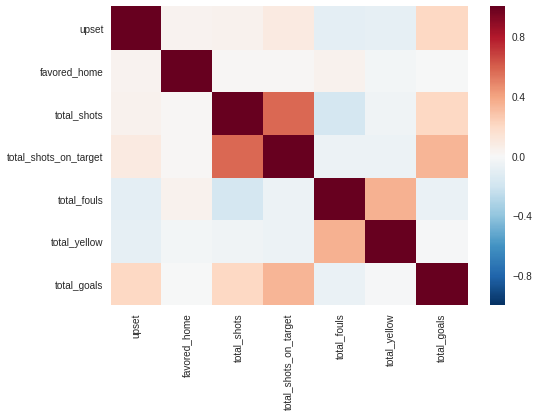

In [51]:
#Figuring out what's related

#Break down our data further so we can do some correlations
numerical_cols=['upset','favored_home','total_shots','total_shots_on_target','total_fouls','total_yellow','total_goals']
numerical_data=setup_data_ft[numerical_cols]

num_cor=numerical_data.corr()

print(num_cor)
print(sns.heatmap(num_cor))

#looks like games where the home team is favored, and has some offense to it are more likely to be upsets

AxesSubplot(0.125,0.125;0.62x0.755)


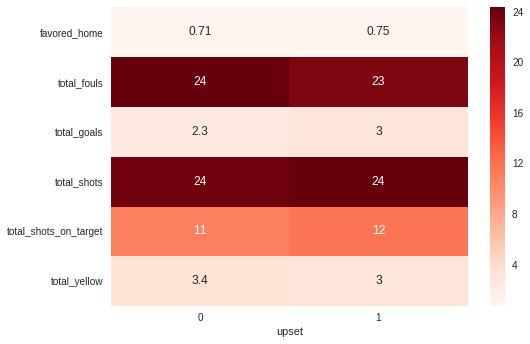

In [52]:
#Making the pivot table

ft_pt=['total_shots','total_shots_on_target','total_fouls','total_yellow','total_goals']

piv=pd.pivot_table(numerical_data,columns=['upset'])

print(sns.heatmap(piv,annot=True,cmap='Reds'))

#looks like upsets are slightly more likely to have more goals, fewer fouls, more shots and to be when the home team is the underdog

In [53]:
#First model-- using logistic regression for classification with all of our factors
from sklearn import linear_model, model_selection
from sklearn.linear_model import LogisticRegression
lr_1=LogisticRegression()

ft_model=['favored_home','total_shots','total_shots_on_target','total_fouls','total_yellow','total_goals']

X_df=setup_data_ft[ft_model]

y_df=setup_data_ft['upset']

X=np.array(setup_data_ft[ft_model])
y=np.array(setup_data_ft['upset'].astype(str))


X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,random_state=8)

log1=linear_model.LogisticRegression(C=1e9).fit(X_train,y_train)


print(log1.score(X_test,y_test))



0.5933014354066986


In [54]:
#How were our factors weighted?

pd.DataFrame(list(zip(X_df.columns, np.transpose(log1.coef_))))

,0,1
0,favored_home,[0.18487473728688025]
1,total_shots,[-0.008651025519841158]
2,total_shots_on_target,[0.009758948585922507]
3,total_fouls,[-0.021695403214246074]
4,total_yellow,[-0.08698259675713454]
5,total_goals,[0.26406984954249707]


In [55]:
#What if we just look at offensive categories?

lr_O=LogisticRegression()
offense_list=['total_shots','total_goals']
X_O_df=setup_data_ft[offense_list]
y_O_df=setup_data_ft['upset']

X_O=np.array(X_O_df)
y_O=np.array(y_O_df)

X_O_train,X_O_test,y_O_train,y_O_test=model_selection.train_test_split(X_O,y_O,random_state=8)

logO=lr_O.fit(X_O_train,y_O_train)

print(logO.score(X_O_test,y_O_test))

##Slightly slightly better


0.6106459330143541


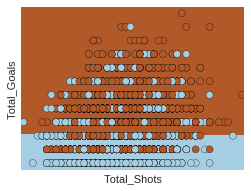

In [56]:
#Color Plot taken from http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html
h=.02
x_min, x_max = X_O[:, 0].min() - .5, X_O[:, 0].max() + .5
y_min, y_max = X_O[:, 1].min() - .5, X_O[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logO.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X_O[:, 0], X_O[:, 1], c=y_O, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Total_Shots')
plt.ylabel('Total_Goals')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

#Not super helpful, but really shows that total goals were slightly stronger

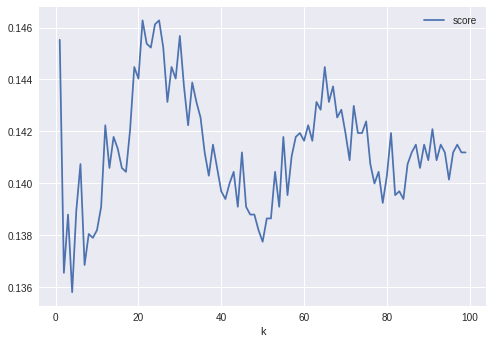

In [89]:
#KNN Model

from sklearn import neighbors

scores = []
for k in range(1,100):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    score = float(sum(pred == y_test)) / len(y)
    scores.append([k, score])
    
plot_data = pd.DataFrame(scores,columns=['k','score'])
plot_data.plot.line(x='k',y='score');

In [92]:
from sklearn import metrics

for k in range(2,60):
  neighbors_num=str(k)
  knn = neighbors.KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  score=knn.score(X_test,y_test)
  print("With {} neighbors, the score is {}".format(neighbors_num,score))
  
#looks like the highest is 25 neighbors, which looks like it adds up

final_knn=neighbors.KNeighborsClassifier(n_neighbors=25)
final_knn.fit(X_train,y_train)
preds=final_knn.predict(X_test)
accuracy=metrics.accuracy_score(y_test,preds)
print('final KNN score is', accuracy)

#huh there's no difference there, I kinda though there would




With 2 neighbors, the score is 0.5460526315789473
With 3 neighbors, the score is 0.5550239234449761
With 4 neighbors, the score is 0.5430622009569378
With 5 neighbors, the score is 0.555622009569378
With 6 neighbors, the score is 0.562799043062201
With 7 neighbors, the score is 0.5472488038277512
With 8 neighbors, the score is 0.5520334928229665
With 9 neighbors, the score is 0.5514354066985646
With 10 neighbors, the score is 0.5526315789473685
With 11 neighbors, the score is 0.55622009569378
With 12 neighbors, the score is 0.56877990430622
With 13 neighbors, the score is 0.562200956937799
With 14 neighbors, the score is 0.5669856459330144
With 15 neighbors, the score is 0.5651913875598086
With 16 neighbors, the score is 0.562200956937799
With 17 neighbors, the score is 0.5616028708133971
With 18 neighbors, the score is 0.5681818181818182
With 19 neighbors, the score is 0.5777511961722488
With 20 neighbors, the score is 0.5759569377990431
With 21 neighbors, the score is 0.5849282296650

In [0]:
#How about a Deep Learning Network?

#Setup
import keras
from keras.layers import Dense
model=keras.Sequential()

#Making target data the right type
from keras.utils import to_categorical
y_binary = to_categorical(y_train)

X_np=np.array(X_train)
y_np=np.array(y_binary)
n_cols=X.shape[1]




In [0]:
model.add(Dense(50,activation='elu',input_shape=(n_cols,)))
model.add(Dense(50,activation='elu'))
model.add(Dense(50,activation='elu'))
model.add(Dense(50,activation='elu'))
#Final layer with 2 outcomes
model.add(Dense(2,activation='softmax'))
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])



In [145]:
#Fitting and Predictions Predictions
model.fit(X_np,y_np,epochs=10,validation_split=.3)
predictions=model.predict(X_test)
#Prediction of upset
upset_prob=predictions[:1]




Train on 3509 samples, validate on 1505 samples
Epoch 1/10
3509/3509 [==============================] - 1s 418us/step - loss: 0.6912 - acc: 0.5352 - val_loss: 0.6907 - val_acc: 0.5362
Epoch 2/10
3509/3509 [==============================] - 1s 364us/step - loss: 0.6914 - acc: 0.5352 - val_loss: 0.6906 - val_acc: 0.5362
Epoch 3/10
3509/3509 [==============================] - 1s 393us/step - loss: 0.6910 - acc: 0.5312 - val_loss: 0.6912 - val_acc: 0.5362
Epoch 4/10
3509/3509 [==============================] - 1s 396us/step - loss: 0.6915 - acc: 0.5352 - val_loss: 0.6905 - val_acc: 0.5362
Epoch 5/10
3509/3509 [==============================] - 1s 386us/step - loss: 0.6912 - acc: 0.5352 - val_loss: 0.6907 - val_acc: 0.5362
Epoch 6/10
3509/3509 [==============================] - 1s 387us/step - loss: 0.6913 - acc: 0.5352 - val_loss: 0.6905 - val_acc: 0.5362
Epoch 7/10
3509/3509 [==============================] - 1s 391us/step - loss: 0.6916 - acc: 0.5352 - val_loss: 0.6912 - val_acc: 0.5362


3509/3509 [==============================] - 1s 392us/step - loss: 0.6914 - acc: 0.5312 - val_loss: 0.6909 - val_acc: 0.5362
Epoch 9/10
3509/3509 [==============================] - 1s 382us/step - loss: 0.6909 - acc: 0.5352 - val_loss: 0.6912 - val_acc: 0.5362
Epoch 10/10
3509/3509 [==============================] - 1s 392us/step - loss: 0.6915 - acc: 0.5352 - val_loss: 0.6909 - val_acc: 0.5362


In [152]:
#Trying with more nodes?

model_nodes=keras.Sequential()
model_nodes.add(Dense(100,activation='elu',input_shape=(n_cols,)))
model_nodes.add(Dense(100,activation='elu'))
model_nodes.add(Dense(100,activation='elu'))
model_nodes.add(Dense(100,activation='elu'))
#Final layer with 2 outcomes
model_nodes.add(Dense(2,activation='softmax'))
model_nodes.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

#Re-fit
model_nodes.fit(X_np,y_np,epochs=10,validation_split=.3)

#Oh that gave us a nice little boost in accuracy from .53 to .6- I tried more than 100 nodes but it didn't improve performance

Train on 3509 samples, validate on 1505 samples
Epoch 1/10
3509/3509 [==============================] - 1s 398us/step - loss: 0.7915 - acc: 0.5301 - val_loss: 0.6770 - val_acc: 0.5681
Epoch 2/10
3509/3509 [==============================] - 1s 188us/step - loss: 0.6925 - acc: 0.5546 - val_loss: 0.7103 - val_acc: 0.5382
Epoch 3/10
3509/3509 [==============================] - 1s 191us/step - loss: 0.6779 - acc: 0.5788 - val_loss: 0.6826 - val_acc: 0.5528
Epoch 4/10
3509/3509 [==============================] - 1s 187us/step - loss: 0.6715 - acc: 0.5691 - val_loss: 0.6993 - val_acc: 0.5415
Epoch 5/10
3509/3509 [==============================] - 1s 187us/step - loss: 0.6743 - acc: 0.5765 - val_loss: 0.6901 - val_acc: 0.5535
Epoch 6/10
3509/3509 [==============================] - 1s 187us/step - loss: 0.6727 - acc: 0.5862 - val_loss: 0.6658 - val_acc: 0.6000
Epoch 7/10
3509/3509 [==============================] - 1s 182us/step - loss: 0.6722 - acc: 0.5913 - val_loss: 0.6647 - val_acc: 0.6040


In [163]:
##Trying with more layers


model_layers=keras.Sequential()
model_layers.add(Dense(100,activation='elu',input_shape=(n_cols,)))
model_layers.add(Dense(100,activation='elu'))
model_layers.add(Dense(100,activation='elu'))
model_layers.add(Dense(100,activation='elu'))
#Final layer with 2 outcomes
model_layers.add(Dense(2,activation='softmax'))
model_layers.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#Re-fit
model_layers.fit(X_np,y_np,epochs=10,validation_split=.3)

#One more layer boosted accuracy a little--- I tried with more but decreased performance-- Adam optimizer also slightly better than SGD-- would need to read pu on differences

Train on 3509 samples, validate on 1505 samples
Epoch 1/10
3509/3509 [==============================] - 2s 597us/step - loss: 0.7938 - acc: 0.5329 - val_loss: 0.6970 - val_acc: 0.5508
Epoch 2/10
3509/3509 [==============================] - 1s 233us/step - loss: 0.6842 - acc: 0.5688 - val_loss: 0.6706 - val_acc: 0.5794
Epoch 3/10
3509/3509 [==============================] - 1s 240us/step - loss: 0.6726 - acc: 0.5893 - val_loss: 0.6726 - val_acc: 0.5927
Epoch 4/10
3509/3509 [==============================] - 1s 229us/step - loss: 0.6675 - acc: 0.5908 - val_loss: 0.6734 - val_acc: 0.5694
Epoch 5/10
3509/3509 [==============================] - 1s 229us/step - loss: 0.6722 - acc: 0.5891 - val_loss: 0.6644 - val_acc: 0.5920
Epoch 6/10
3509/3509 [==============================] - 1s 233us/step - loss: 0.6599 - acc: 0.6062 - val_loss: 0.6693 - val_acc: 0.5953
Epoch 7/10
3509/3509 [==============================] - 1s 230us/step - loss: 0.6756 - acc: 0.5799 - val_loss: 0.6886 - val_acc: 0.5900


3509/3509 [==============================] - 1s 228us/step - loss: 0.6500 - acc: 0.6076 - val_loss: 0.6447 - val_acc: 0.5801
